## learning-AI : deep learning application (61357002)
### assignment : abalone regression (DL)

**전복 데이터를 순환 데이터로 만들어 CNN, LSTM 방식의 regression**

<br>

- **임규연 (lky473736)**
- 2024.09.22. ~ 2024.09.23.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/1/abalone
- **data abstract** : Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)

-----

## <span id='dl'><mark>DL</mark></span>
    
deep learning으로 abalone을 regression한다. 목차는 아래와 같다.

- **1. 간단한 탐색적 데이터 분석 및 데이터 전처리 수행, 순환 데이터로 구성**
- **2. CNN-DNN**
- **3. LSTM-DNN**
- **4. CNN-LSTM convergence**

In [43]:
# 라이브러리 import

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

------

### 1. 간단한 탐색적 데이터 분석 및 데이터 전처리 수행, 순환 데이터로 구성
- 데이터 시각화 및 필요한 정보를 얻어낸다.
- 결측치 제거, outlier 제거 등의 데이터 전처리를 수행한다.

In [44]:
# 데이터 읽기

df = pd.read_csv("../../data/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
# df의 행의 갯수, 열의 갯수, feature 파악

df.shape, df.columns

((4177, 10),
 Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
        'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
       dtype='object'))

In [46]:
# 결측치 확인

df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [47]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [48]:
# df의 기본적인 정보 및 기초통계량

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [49]:
# Sex 열을 label encoding

'''
    male : 0
    female : 1
    i (암숫컷) : 2
'''

print (set(df['Sex']))

for idx in range (df.shape[0]) : 
    compo = df.at[idx, 'Sex']
    
    if compo == 'M' : 
        df.at[idx, 'Sex'] = 0
        
    elif compo == 'F' :
        df.at[idx, 'Sex'] = 1
        
    else :
        df.at[idx, 'Sex'] = 2
         
print (set(df['Sex']))

{'I', 'M', 'F'}
{0, 1, 2}


In [50]:
# 특정 component가 0인 값이 있다면 제거해주기

print (df[df == 0].count()) # height 열 중에서 2개가 0임
df = df[df['Height'] != 0]
print (df[df == 0].count())

id                   1
Sex               1528
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64
id                   1
Sex               1528
Length               0
Diameter             0
Height               0
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


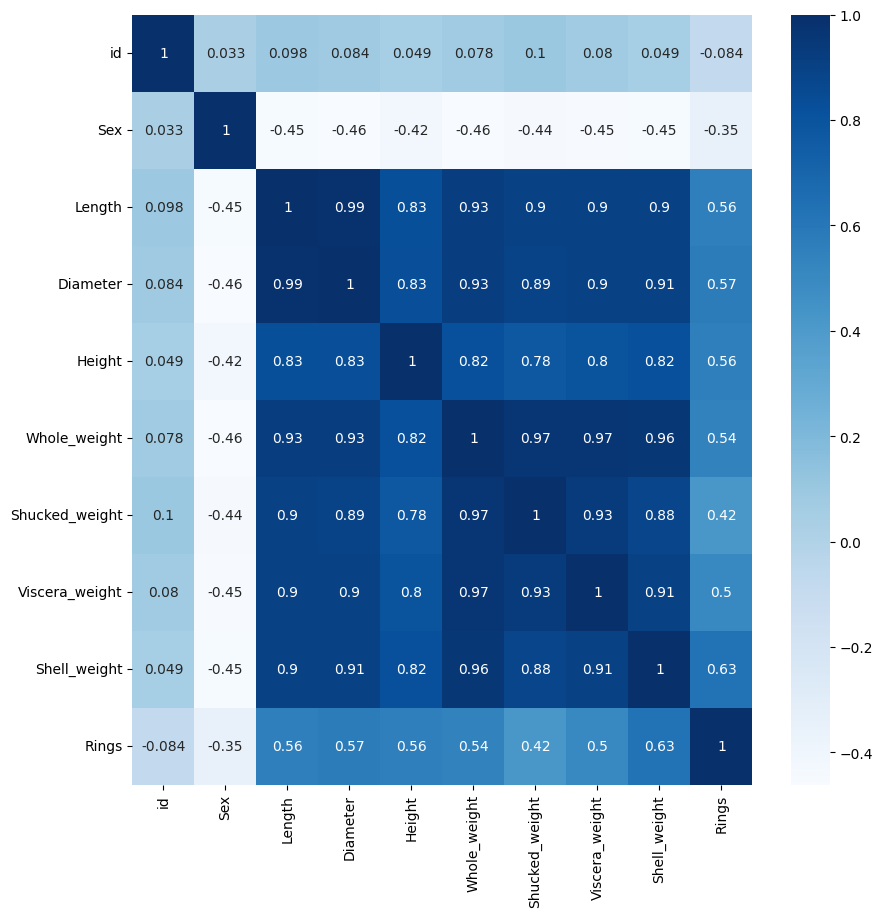

In [51]:
# heatmap 그리기

plt.figure(figsize=(10, 10))

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cbar=True,
           cmap='Blues', annot_kws={"size": 10})
plt.show()

위를 확인하였을 때, **id, Sex 열은 Rings 열과 매우 작은 상관관계성을 가지기 때문에 제거해야 한다.** 또한 아래와 같은 결과를 알 수 있다.


- **높은 상관관계**
     - **Length와 Diameter (0.99)**
        - 매우 높은 양의 상관관계, Length와 Diameter는 거의 일치

    - **Length와 Whole weight (0.93)**, **Diameter와 Whole weight (0.93)**:
        - 길이와 직경, 무게가 매우 높은 상관관계, 이를 통하여 길이랑 직경이 크면 무게도 무겁다는 것을 예측 가능

    - **Whole weight와 Shucked weight (0.97)**, **Whole weight와 Viscera weight (0.97)**:
        - 전복의 전체 무게는 껍질을 벗긴 무게와 내장 무게와 매우 높은 상관관계를 가지므로, 전체 무게가 부분 무게들에 의해 크게 좌우되는 것을 예측 가능

    - **Shucked weight와 Viscera weight (0.93)**:
        - 두 무게가 함께 증가하거나 감소하는 경향 있음

    - **Length와 Shell weight (0.9)**, **Diameter와 Shell weight (0.91)**:
        - 전복의 길이와 직경은 껍질 무게와도 높은 상관관계 보임

- **낮은 상관관계**  
    - **Sex와 다른 변수들**
        - 성별은 다른 연속형 변수들과 음의 상관관계를 가지며, 특히 높이는 -0.42, 껍질 무게는 -0.45로 나타남, 이는 성별이 전복의 다른 물리적 특성과 직접적으로 큰 관련이 없음을 나타냄
    - **Rings와 Shucked_weight**
        - 0.42로 target값과 적은 상관관계를 가지고 있음
   

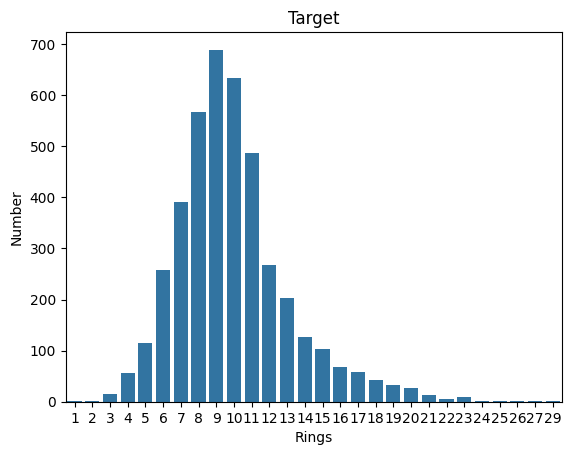

In [52]:
# seaborn countplot을 통한 각 레이블 도수 확인

sns.countplot (data=df, x='Rings')
plt.xlabel ("Rings")
plt.ylabel ("Number")
plt.title ("Target")
plt.show()

In [53]:
# target의 class 도수를 확인 (숫자로)

df['Rings'].value_counts()

Rings
9     689
10    634
8     567
11    487
7     391
12    267
6     258
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

  
현재 같은 디렉토리에 속해 있는 ```./CNN-LSTM(recurrence)_regression_abalone(assignment)```에서는 labeling을 새로 하여, 각 label을 총 3개의 군집으로 구성되게 하였다. 그에 관한 코드는 아래와 같다.

```python
for idx, row in df.iterrows() : 
    if row['Rings'] <= 8 :
        df.at[idx, 'Rings'] = 0 # 'young'
    elif 8 < row['Rings'] <= 11 :
        df.at[idx, 'Rings'] = 1 # 'medium'
    else :
        df.at[idx, 'Rings'] = 2 # 'old'
```

**다만, 현재 우리가 해야 할 문제는 regression이고, 결국 연속적인 Rings 값들을 input의 패턴을 알아내어 예측해내는 것이니, 범주화하여 재구성하는 것이 아닌 0-based로 encoding을 하여야 할 것이다.** 따라서 LabelEncoder를 이용하여 label encoding을 한 후에 추후 학습 모델에 대입하기 위한 형태로 변환한다.

In [54]:
# Sex, id 특성 제거 및 Rings를 label encoding

print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거
df = df.drop(columns=['id']) # id 특성 제거

df['Rings'] = LabelEncoder().fit_transform(df['Rings'])

df.head(20)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,7
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,19
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,15
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,8
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,18


In [55]:
# abalone_input, abalone_target 만들기

import matplotlib.pyplot as plt
import numpy as np

abalone_input = df.drop('Rings', axis=1)
abalone_target = df['Rings']

abalone_input.shape, abalone_target.shape

((4175, 7), (4175,))

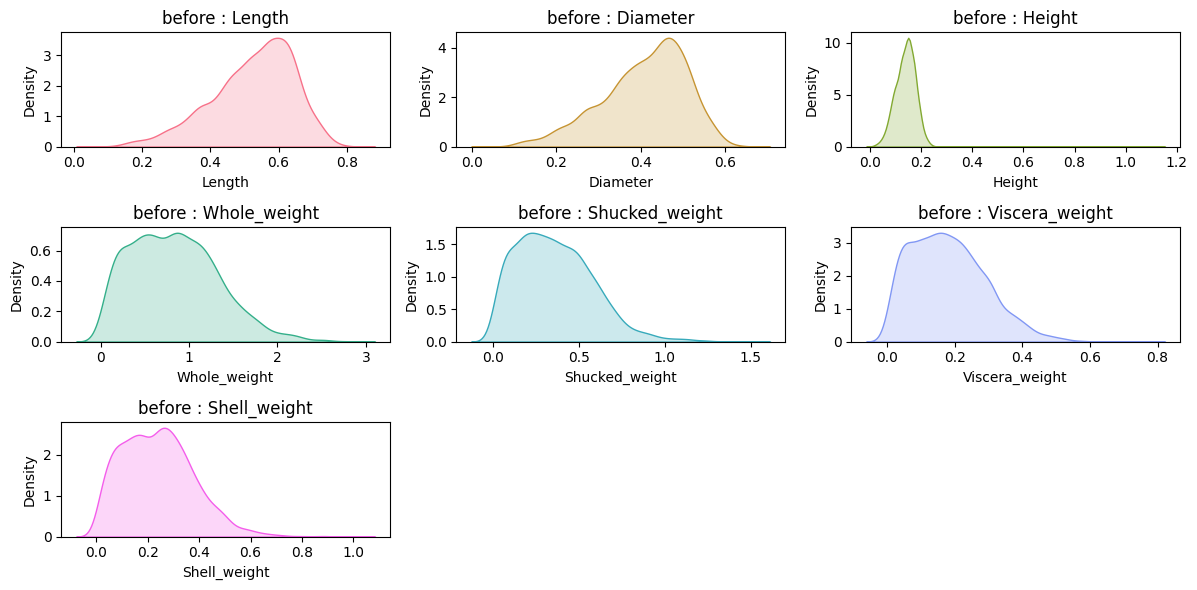

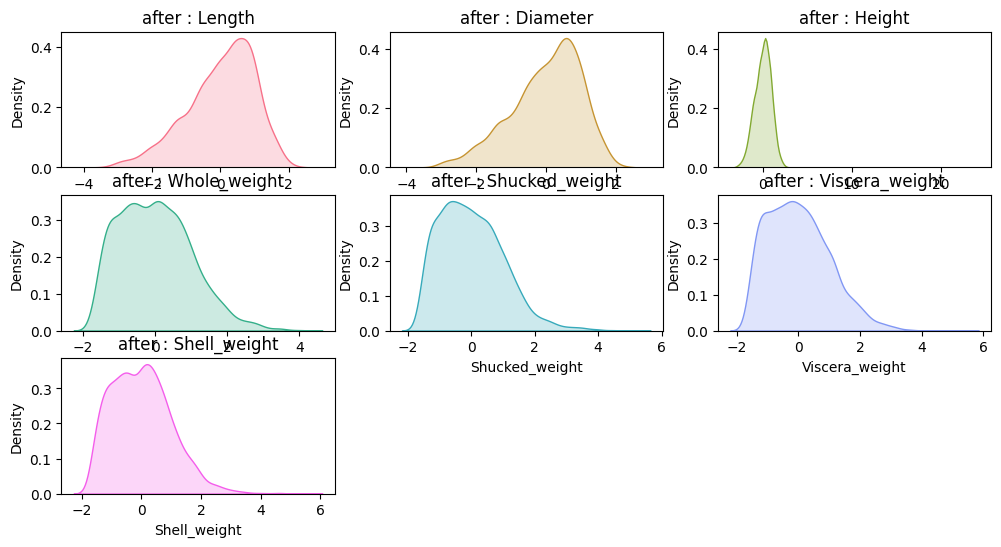

In [56]:
# z-score normalization

# 정규화 전, 각 feature마다 분포 확인하기
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'before : {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

############################################

from sklearn.preprocessing import StandardScaler

normalizier = StandardScaler()
abalone_input_scaled = pd.DataFrame(normalizier.fit_transform(abalone_input), 
                                    columns=df.columns[:-1])  # normalization

############################################

print ()

# 정규화 후
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input_scaled[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'after : {feature}')
    plt.xlabel(feature)

- **Reference**
    - https://github.com/lky473736/learning-AI/blob/main/tool/recurrent_data/exploration_recurrent_data.ipynb
    - ```~/tool/recurrence_data``` : 순환 데이터를 만들기 위한 split_sequence의 다양한 variation 및 그에 관한 테스트 (임규연, lky473736)


본 문서에서는 순환 데이터를 대입하여 학습을 진행한다. 순환 데이터는 각 레코드를 독립적으로 학습하는 것이 아니라, 앞선 데이터를 함께 고려하여 학습하게 하는 데이터 구성인데, 예를 들어, 모델이 3번째 레코드를 학습할 때, 1번째와 2번째 레코드까지 반영하여 학습한다면, 보다 유기적인 학습이 가능해지는 것이다. 이렇게 하면 단순한 레코드 학습을 넘어서 여러 레코드를 한 번에 학습할 수 있게 되어 효율적이다.

순환 데이터를 구성 중 target의 값을 결정하는 기준은 각 문제에 따라 다르다. 크게는 아래와 같이 구분이 될 수 있다.

- ***classification 문제일 때***
    - **특정 window의 target 값 중 빈도가 가장 높은 클래스 선택**
    - **특정 window에서 마지막 레코드의 target 값을 선택**
    - **특정 window에서 특정 클래스의 존재 여부를 기반으로 target 결정**

- ***Regression 문제일 때***
    - **window 내 마지막 레코드의 target 값을 선택**
    
본 문서에서는 **regression 문제를 다루며, window 내 마지막 레코드의 target값을 선택하도록 하겠다.**

- **Reference**
    - https://github.com/lky473736/learning-AI/blob/main/tool/recurrent_data/exploration_recurrent_data.ipynb 
    
<img src="https://velog.velcdn.com/images/wlwl99/post/e0ebddc2-e075-41e5-bec6-ac424364d1da/image.png" width=400px>

위 함수는 **sliding window 방식으로 구성되어 있다**. sliding window란 투 포인터 풀이 기법에서 많이 쓰이는 테크닉으로, 마치 위 figure의 방식과 같이 좌우로 미끌어지면서 원소를 택하는 방법이다. 여기서 **window는 위 figure에서 원소 4개를 감싸는 박스를 의미하며, window의 사이즈는 4개가 된다**.

위 함수에서 **len(sequences)는 df의 records의 수(행의 수)를 의미한다**. 즉, 행의 수만큼 반복문을 돌리겠다는 것이고, 여기서 i는 행의 위치가 된다. end_ix는 현재 행의 위치와 n_steps를 더한 값으로 구성되며, 여기서 n_steps가 바로 window의 수가 된다. 1차원적으로 생각해보면, i는 위 figure에서 window의 첫 번째 원소를 가리키는 index를 의미하고, n_steps를 i와 더하여 window의 마지막 원소를 가리키는 index인 end_ix라고 선언되어 있다.

end_ix가 전체 데이터프레임의 행의 갯수를 넘어가면 함수가 종료되며, 그 전까지 함수를 진행하는데, seq_x와 seq_y에 각각 순환 데이터를 구성한 input과 target을 집어 넣는다. sequences[i:end_ix, :-1]은 i행부터 end_ix - 1행까지, 가장 마지막 열인 target 열을 제외하고 split한 input 데이터를 의미하며, sequences[end_ix - 1, -1]은 end_ix - 1행의 마지막 열인 target 열의 값을 target 데이터로 지정해둔다. 여기서 알 수 있는 것은, **기존 split_sequences 함수는 각 window의 마지막 target 값을 순환 데이터의 target 값으로 만든다는 사실이다**. 위 경우에서 **'특정 window에서 마지막 레코드의 target 값을 선택하는 경우'**이다.

따라서 아래와 같은 함수를 사용한다. 아래 함수는 이미 많이 다루었던 ```split_sequence```이다. 


In [57]:
def split_sequences(sequences, n_steps) :
	X, y = list(), list()
	for i in range(len(sequences)):
    # find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [58]:
# 순환 데이터 구성

# split_sequence을 이용하여 순환 데이터를 구성

print(abalone_target.isnull().sum())

X_seq, y_seq = split_sequences(np.c_[abalone_input_scaled, abalone_target], 
                                    n_steps=10) # window 사이즈를 10으로 구성

print (X_seq.shape, y_seq.shape)

0
(4166, 10, 7) (4166,)


In [59]:
# 실제로 어떻게 구성되었는지 앞쪽 5개의 component만 출력

print (np.isnan(y_seq).sum())

for idx in range (5) :
    print (f"X_seq[{idx}] : ", X_seq[idx][:5])
    print (f"y_seq[{idx}] : ", y_seq[idx])
    
    if idx == 0 : 
        prev = X_seq[idx]
        print()
        continue

    if (prev[1:] == X_seq[idx][:-1]).all() : 
        '''
            step 1씩 이동했으니깐, 이전 X_train_seq 원소의 2번째 record ~ 마지막번째 record와
            현재 X_train_seq 원소의 첫번째 record ~ 마지막-1번째 record는 같을 수밖에 없습니다.
        '''
         
        print ("window가 step 1씩 이동하면서 순환 데이터를 만듦")
    
    prev = X_seq[idx]
    print()

0
X_seq[0] :  [[-0.57527573 -0.43282928 -1.06861921 -0.64248543 -0.60819984 -0.72680916
  -0.63819465]
 [-1.4498756  -1.44081267 -1.18846462 -1.230912   -1.17144626 -1.20585737
  -1.21292621]
 [ 0.04943846  0.12156159 -0.1098559  -0.31002952 -0.46400875 -0.35725768
  -0.20714599]
 [-0.70021857 -0.43282928 -0.34954673 -0.63840622 -0.64875358 -0.6081877
  -0.60227393]
 [-1.61646605 -1.54161101 -1.42815545 -1.27272394 -1.21650598 -1.28797992
  -1.32068838]]
y_seq[0] :  18.0

X_seq[1] :  [[-1.4498756  -1.44081267 -1.18846462 -1.230912   -1.17144626 -1.20585737
  -1.21292621]
 [ 0.04943846  0.12156159 -0.1098559  -0.31002952 -0.46400875 -0.35725768
  -0.20714599]
 [-0.70021857 -0.43282928 -0.34954673 -0.63840622 -0.64875358 -0.6081877
  -0.60227393]
 [-1.61646605 -1.54161101 -1.42815545 -1.27272394 -1.21650598 -1.28797992
  -1.32068838]
 [-0.82516141 -1.08801849 -1.06861921 -0.97392154 -0.98444845 -0.94124026
  -0.85371899]]
y_seq[1] :  13.0
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_seq[2] :  [[ 

In [60]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_seq = le.fit_transform(y_seq)

print(y_seq[:5])  

[18 13  9 10  9]


In [61]:
# train, test set 구성

from sklearn.model_selection import train_test_split

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq,
                                                    y_seq,
                                                    test_size = 0.2) 

print (X_train_seq.shape, y_train_seq.shape)
print (X_test_seq.shape, y_test_seq.shape)

(3332, 10, 7) (3332,)
(834, 10, 7) (834,)


------


### 2. CNN-DNN

<img src="https://miro.medium.com/v2/resize:fit:1280/1*usA-K08Tn5i6P7eLvV8htg.png" width=500px>

- 위 figure처럼 CNN 부분에서는 feature extraction을 진행하고, DNN (fully connected layer)에서는 CNN으로부터 extracted된 특성 정보를 가지고 분류 및 회귀를 수행한다. 
    - 이번 문서에서 CNN의 한 part는 convolution -> batch normalize -> dropout 순으로 구성할 것이다.

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 9, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 9, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 9, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 9, 16)          │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 9, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 9, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 9, 8)           │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 9, 8)           │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 9, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,385 (44.47 KB)

 Trainable params: 11,145 (43.54 KB)

 Non-trainable params: 240 (960.00 B)

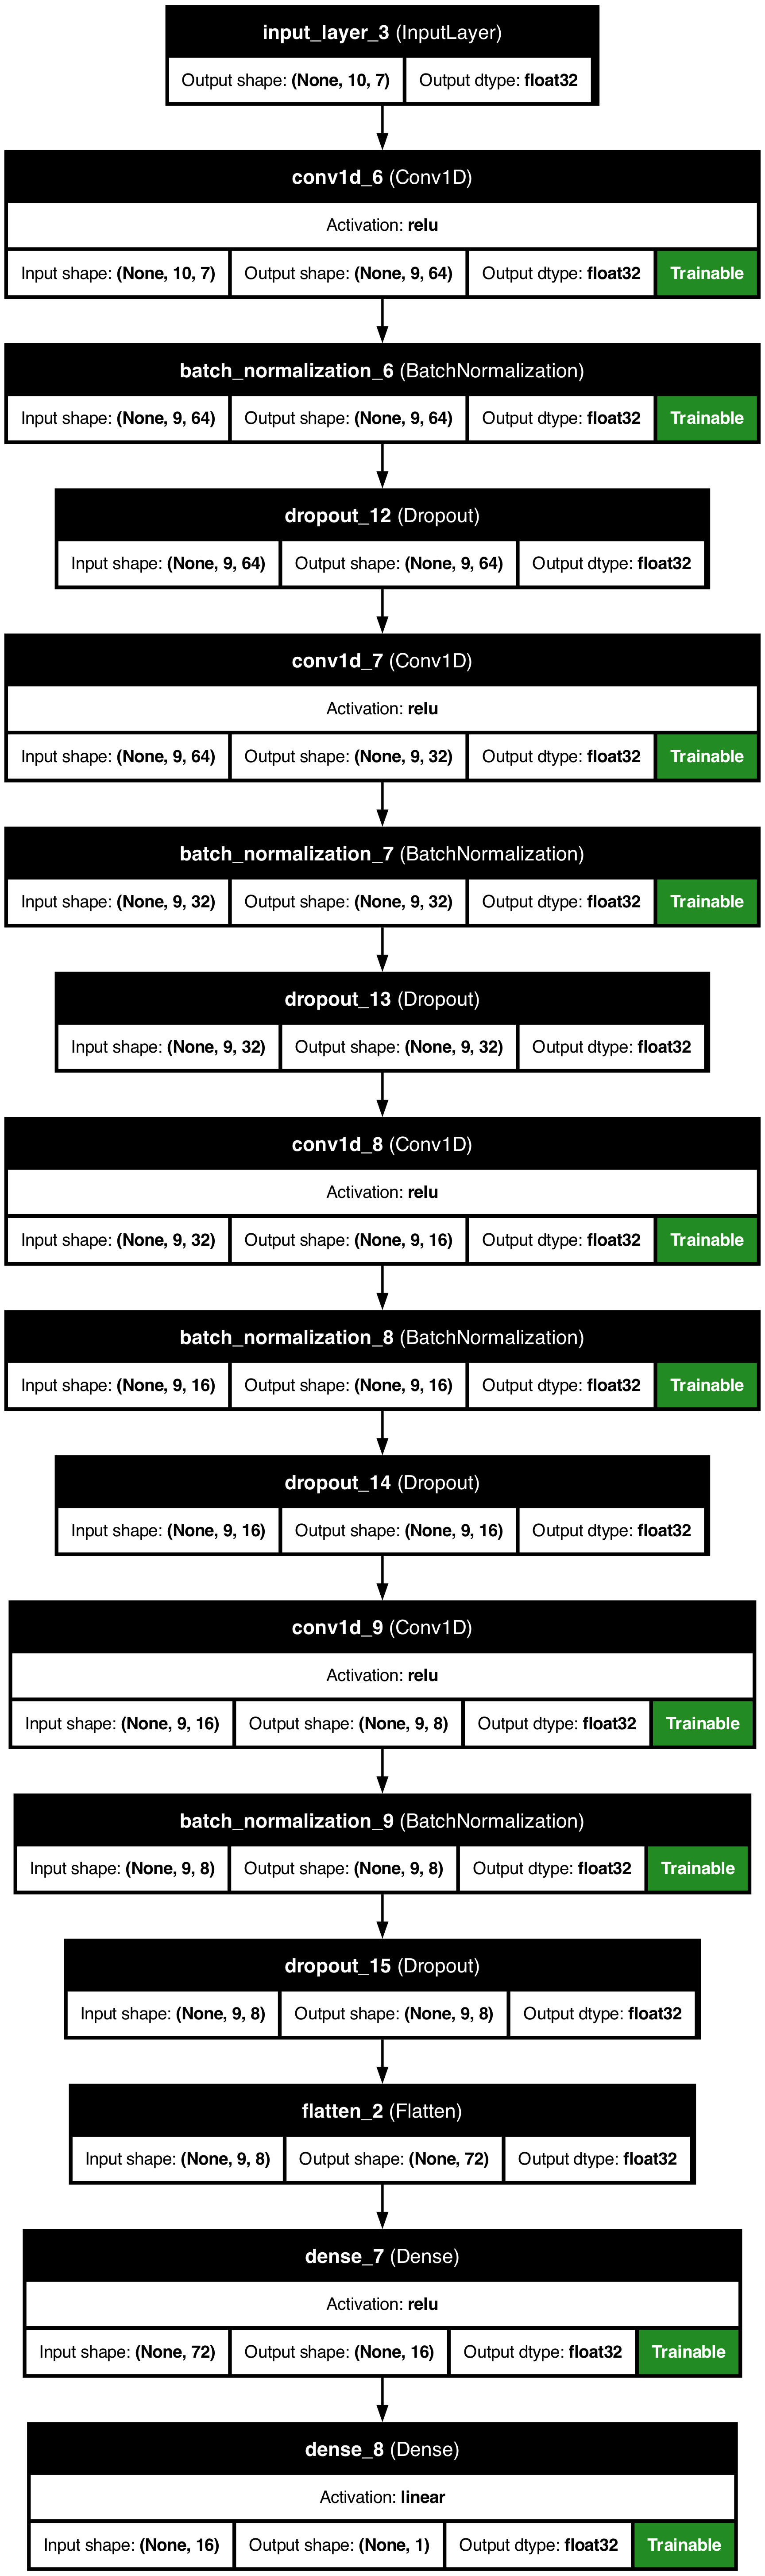

In [62]:
# modeling

from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    점점 kernel size를 늘려나가서 feature extraction을 효과적으로 할 수 있도록 구성하였다.
    dense layer를 여기서 더 추가하면 overfitting이 일어나서, 여기서 멈춘다.
'''

# block 1
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(conv1)
dropout1 = Dropout(0.6)(batch_norm1)

# block 2
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(dropout1)
batch_norm2 = BatchNormalization()(conv2)
dropout2 = Dropout(0.5)(batch_norm2)

# block 3
conv3 = Conv1D(filters=16, kernel_size=4, activation='relu', padding='same')(dropout2)
batch_norm3 = BatchNormalization()(conv3)
dropout3 = Dropout(0.5)(batch_norm3)

# block 4
conv4 = Conv1D(filters=8, kernel_size=4, activation='relu', padding='same')(dropout3)
batch_norm4 = BatchNormalization()(conv4)
dropout4 = Dropout(0.5)(batch_norm4)

# flatten
flat = Flatten()(dropout4)

# dense layers
dense1 = Dense(16, activation='relu')(flat)
output_layer = Dense(1)(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
keras.utils.plot_model(model, 
                       show_shapes=True, 
                       show_layer_activations=True, 
                       show_dtype=True, 
                       show_layer_names=True, 
                       show_trainable=True)

In [63]:
# compile

optimizer = keras.optimizers.Adam()
model.compile (optimizer=optimizer, 
               loss='MSE', 
               metrics=['MAE'])

In [64]:
# fit

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
#                                                 restore_best_weights=True)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model(model, X_train_seq, y_train_seq) :
#     early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                        batch_size=16,
#                         callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)
    
    return history

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # (n_steps, 특징 수)
history = train_model(model, X_train_seq, y_train_seq)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_61365/291636803.py
Epoch 1/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - MAE: 6.6910 - loss: 58.4376 - val_MAE: 2.0045 - val_loss: 7.9204
Epoch 2/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 3.1795 - loss: 17.7645 - val_MAE: 2.0298 - val_loss: 7.8237
Epoch 3/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 2.6319 - loss: 12.3478 - val_MAE: 1.9955 - val_loss: 7.3411
Epoch 4/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MAE: 2.5048 - loss: 11.8865 - val_MAE: 1.8439 - val_loss: 6.8203
Epoch 5/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 2.4607 - loss: 11.1018 - val_MAE: 1.8010 - val_loss: 6.1331
Epoch 6/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MAE: 2.2837 - loss: 9.5677 - val_MAE: 1.7292 - val_loss: 5.6947
Epoch 7/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MAE: 2.2723 - loss: 9.4591 - val_MAE: 1.7947 - val_loss: 6.0132
Epoch 8/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MAE: 2.226

Epoch 54/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MAE: 1.6168 - loss: 5.1155 - val_MAE: 1.3875 - val_loss: 3.7081
Epoch 55/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - MAE: 1.6526 - loss: 5.0967 - val_MAE: 1.3278 - val_loss: 3.6582
Epoch 56/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MAE: 1.6646 - loss: 5.3268 - val_MAE: 1.3364 - val_loss: 3.5752
Epoch 57/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MAE: 1.6498 - loss: 5.1347 - val_MAE: 1.3178 - val_loss: 3.5183
Epoch 58/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MAE: 1.6029 - loss: 5.1853 - val_MAE: 1.3346 - val_loss: 3.6322
Epoch 59/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MAE: 1.6096 - loss: 5.1635 - val_MAE: 1.3040 - val_loss: 3.4148
Epoch 60/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MAE: 1.5671 - loss: 4.7075 - val_MAE: 1.3815 - val_loss: 3.8162


{'MAE': [5.327730178833008, 3.0036022663116455, 2.6375160217285156, 2.518578052520752, 2.3697826862335205, 2.344163656234741, 2.270577907562256, 2.2180049419403076, 2.1304125785827637, 2.098681926727295, 2.010080099105835, 2.0534651279449463, 2.012974262237549, 1.9617218971252441, 1.9574346542358398, 1.9435255527496338, 1.9712817668914795, 1.915832281112671, 1.9402010440826416, 1.9263060092926025, 1.8596181869506836, 1.846811056137085, 1.8551076650619507, 1.8329964876174927, 1.828122854232788, 1.8149056434631348, 1.8155750036239624, 1.7881755828857422, 1.7669802904129028, 1.761680245399475, 1.7549855709075928, 1.7201124429702759, 1.771357536315918, 1.7459087371826172, 1.7580336332321167, 1.7576255798339844, 1.7086739540100098, 1.708616852760315, 1.7644942998886108, 1.726696252822876, 1.6805585622787476, 1.69707453250885, 1.6653897762298584, 1.6773823499679565, 1.6967005729675293, 1.673584222793579, 1.6364516019821167, 1.630313754081726, 1.622575044631958, 1.6274076700210571, 1.61718845

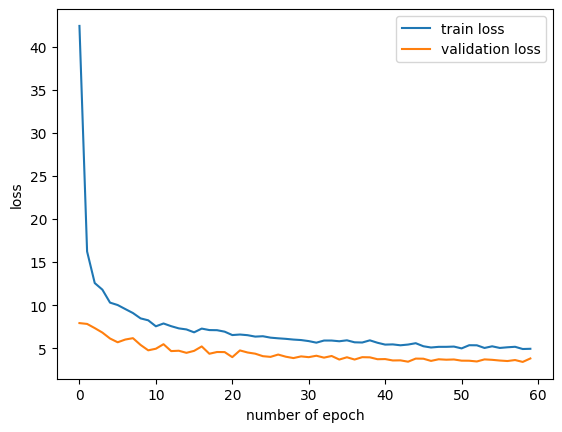

In [65]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

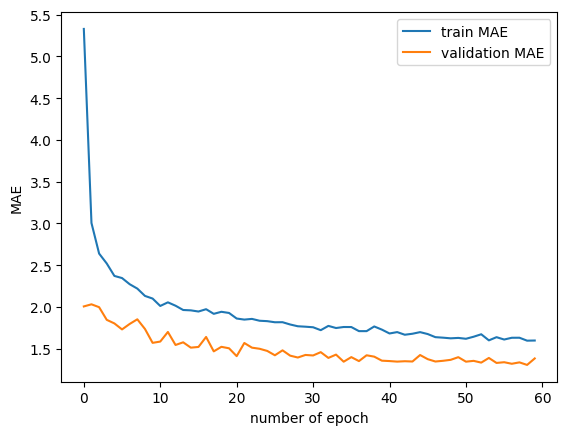

In [66]:
# MAE 시각화

plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.xlabel('number of epoch')
plt.ylabel('MAE')
plt.legend (['train MAE', 'validation MAE'])
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 3.797073948477418
MAE: 1.372589913775309
R^2 Score: 0.626


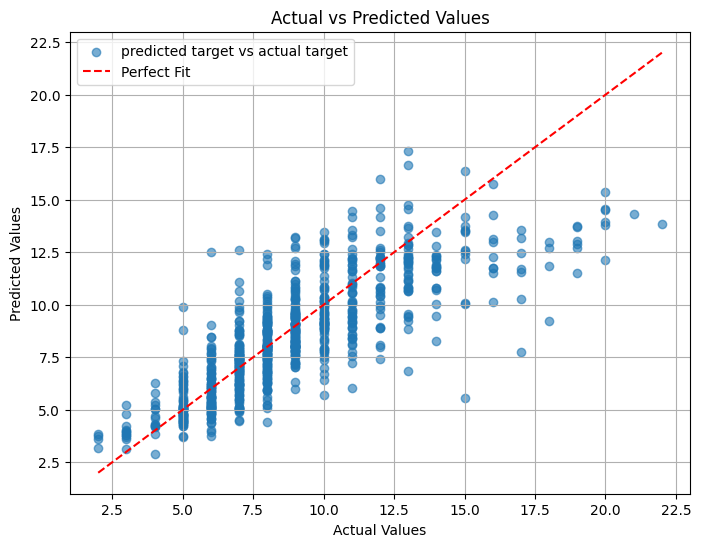

In [67]:
# MSE, MAE, R^2 구하기

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test_seq)
# print (y_test_pred)

mse = mean_squared_error(y_test_seq, y_test_pred)
mae = mean_absolute_error(y_test_seq, y_test_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

r2_1 = r2_score(y_test_seq, y_test_pred)
print(f'R^2 Score: {r2_1:.3f}')

# 예측값과 실제값 시각화

plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq, y_test_pred, alpha=0.6, 
            label='predicted target vs actual target')
plt.plot([min(y_test_seq), max(y_test_seq)], 
         [min(y_test_seq), max(y_test_seq)], 
         color='red', linestyle='--', 
         label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# evaluate

eval_1 = model.evaluate(X_test_seq, y_test_seq)
print (eval_1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 1.3293 - loss: 3.7284 
[3.79707407951355, 1.3725900650024414]


------


### 3. LSTM-DNN

<img src="https://user-images.githubusercontent.com/45377884/88295143-fe34f400-cd37-11ea-8ef5-4a5c941718eb.png" width=500px>

- 위 figure처럼 LSTM 부분에서는 feature extraction을 진행하고, DNN (fully connected layer)에서는 extracted된 특성 정보를 가지고 분류 및 회귀를 수행한다. 

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 16)         │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 10, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 64 (256.00 B)

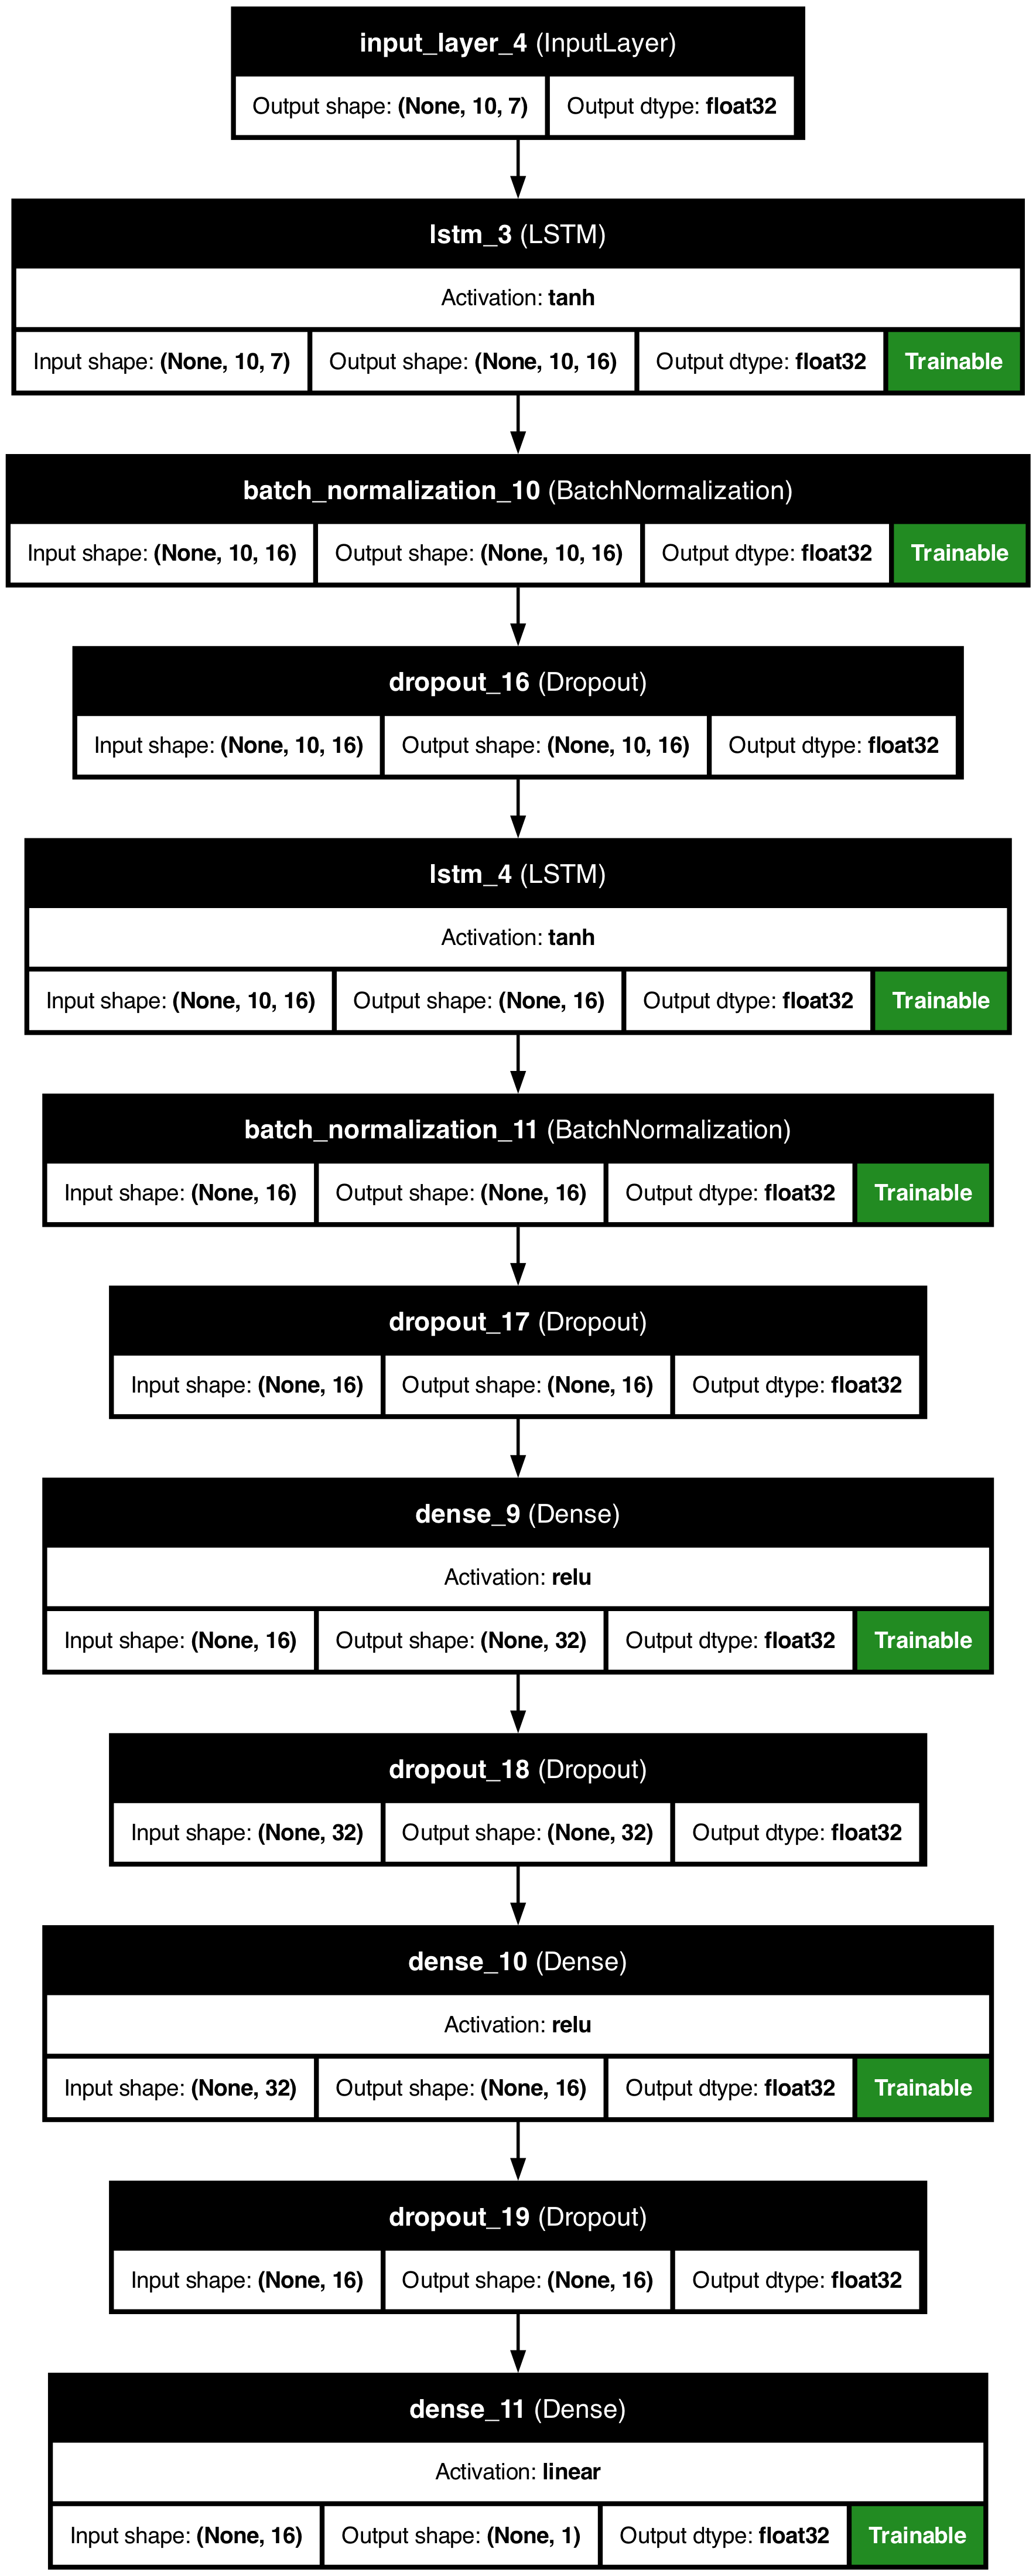

In [69]:
# modeling

from tensorflow.keras import regularizers

# Input layer
input_layer = keras.Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    계속적으로 val_loss가 늘어나는 현상 발견
    regularizer를 추가하여 l2 규제를 하게끔 함
    l1 규제 : 절댓값 규제 (특정 feature을 0으로 만들 수 있음)
    l2 규제 : 제곱 규제 (특정 feature을 0과 가깝게 만들 수 있음)
'''

# 첫 번째 LSTM 레이어 + BatchNormalization + Dropout
lstm_1 = keras.layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01), 
                           return_sequences=True)(input_layer)
batch_1 = keras.layers.BatchNormalization()(lstm_1)
dropout_1 = keras.layers.Dropout(0.2)(batch_1)

# 두 번째 LSTM 레이어 + BatchNormalization + Dropout
lstm_2 = keras.layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01), 
                           return_sequences=False)(dropout_1)
batch_2 = keras.layers.BatchNormalization()(lstm_2)
dropout_2 = keras.layers.Dropout(0.2)(batch_2)

# Dense 레이어 + Dropout
dense_1 = keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_2)
dropout_3 = keras.layers.Dropout(0.2)(dense_1)

dense_2 = keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_3)
dropout_4 = keras.layers.Dropout(0.2)(dense_2)

# Output layer
output_layer = keras.layers.Dense(1)(dropout_4)

# Model definition
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Model summary
model.summary()

# Plot model
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True,
                      show_dtype=True,
                      show_layer_names=True,
                      show_trainable=True)


In [70]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer, 
               loss='MSE', 
               metrics=['MAE'])

In [71]:
# fit

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping 및 ReduceLROnPlateau 추가함 (val_loss가 계속 상승하고 있어서 조치 취하기 위함)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model() :
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                       callbacks=[early_stopping, reduce_lr],
                        verbose=True)
    
    return history
    
history = train_model()
print (history)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_61365/3872882423.py
Epoch 1/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - MAE: 7.0242 - loss: 62.7879 - val_MAE: 5.8669 - val_loss: 43.6195 - learning_rate: 0.0010
Epoch 2/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 3.1451 - loss: 18.0976 - val_MAE: 4.2282 - val_loss: 25.7760 - learning_rate: 0.0010
Epoch 3/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 2.8390 - loss: 14.8730 - val_MAE: 2.9113 - val_loss: 14.5884 - learning_rate: 0.0010
Epoch 4/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 2.6012 - loss: 12.9875 - val_MAE: 2.0718 - val_loss: 8.7891 - learning_rate: 0.0010
Epoch 5/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 2.5058 - loss: 11.5751 - val_MAE: 1.6842 - val_loss: 6.7986 - learning_rate: 0.0010
Epoch 6/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 2.4452 - loss: 11.3606 - val_MAE: 1.5583 - val_loss: 5.7720 - learning_rate: 0.0010
Epoch 7/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9m

{'MAE': [5.572962760925293, 2.9703214168548584, 2.738612174987793, 2.5525686740875244, 2.4650559425354004, 2.3990402221679688, 2.393038511276245, 2.327078342437744, 2.2242915630340576, 2.2447755336761475, 2.214682102203369, 2.172300338745117, 2.1203677654266357, 2.148310899734497, 2.095327854156494, 2.037416934967041, 2.083606243133545, 2.086599588394165, 2.0699830055236816, 2.0153074264526367, 2.0119376182556152, 2.015470027923584, 2.076023817062378, 2.027125120162964, 2.0271613597869873, 2.0130746364593506, 1.9621658325195312, 2.002958297729492, 1.9915432929992676, 2.0110044479370117, 1.9870597124099731, 2.0282344818115234, 1.9918206930160522, 1.9932507276535034], 'loss': [45.45518493652344, 16.089557647705078, 13.954115867614746, 12.34281063079834, 11.441632270812988, 11.207337379455566, 10.894954681396484, 10.646113395690918, 9.708785057067871, 9.785832405090332, 9.821252822875977, 9.252181053161621, 8.910710334777832, 9.139432907104492, 8.746652603149414, 8.366934776306152, 8.7237

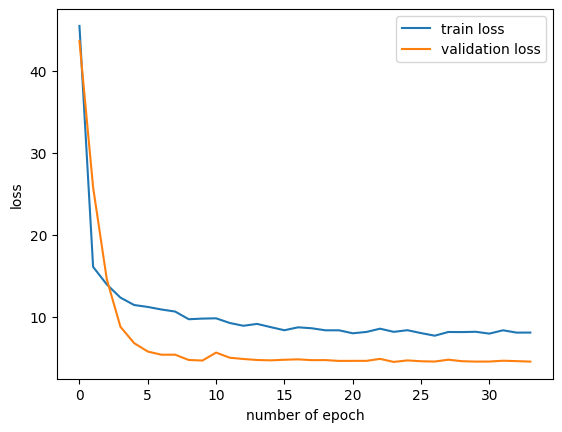

In [72]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

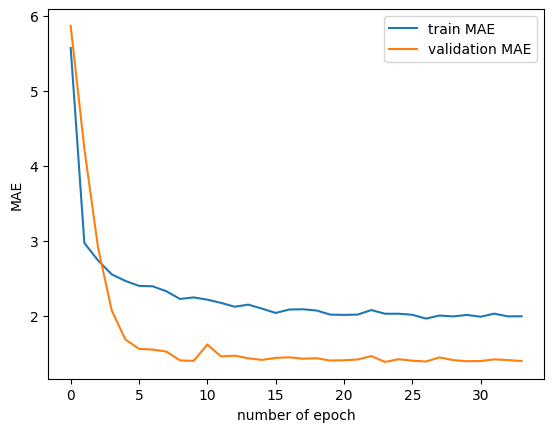

In [73]:
# MAE 시각화

plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.xlabel('number of epoch')
plt.ylabel('MAE')
plt.legend (['train MAE', 'validation MAE'])
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MSE: 4.109523811044546
MAE: 1.4271976890609706
R^2 Score: 0.595


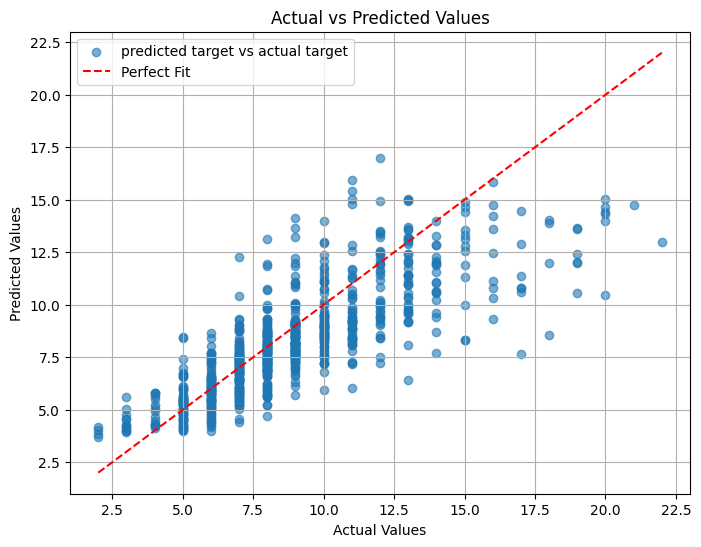

In [74]:
# MSE, MAE, R^2 구하기

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test_seq)
# print (y_test_pred)

mse = mean_squared_error(y_test_seq, y_test_pred)
mae = mean_absolute_error(y_test_seq, y_test_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

r2_2 = r2_score(y_test_seq, y_test_pred)
print(f'R^2 Score: {r2_2:.3f}')

# 예측값과 실제값 시각화

plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq, y_test_pred, alpha=0.6, 
            label='predicted target vs actual target')
plt.plot([min(y_test_seq), max(y_test_seq)], 
         [min(y_test_seq), max(y_test_seq)], 
         color='red', linestyle='--', 
         label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# evaluate

eval_2 = model.evaluate(X_test_seq, y_test_seq)
print (eval_2)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 1.3397 - loss: 4.6430 
[4.8691840171813965, 1.4271974563598633]


------


### 4. CNN-LSTM convergence

<img src="https://www.researchgate.net/publication/343341551/figure/fig4/AS:919348650704897@1596201207194/Architecture-of-the-Hybrid-1D-CNN-LSTM-model-for-human-activity-recognition.pngg" width=500px>

- **Reference**
    - https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FArchitecture-of-the-Hybrid-1D-CNN-LSTM-model-for-human-activity-recognition_fig4_343341551&psig=AOvVaw3H4z-wEtr3Asr2SOEydWi3&ust=1727104308517000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCMDRk4fr1ogDFQAAAAAdAAAAABAJ
    - https://www.researchgate.net/figure/The-proposed-CNN-LSTM-model-architecture_fig5_356018554
    
CNN과 LSTM을 결합하여 사용한다. CNN으로 먼저 feature extraction을 진행한 후, LSTM으로 장기 기억 track을 하나 더 두어 순환형 데이터에 맞는 학습을 진행할 것이다. 이렇게 학습 시 이점은 아래와 같다고 생각된다.

- 맨 처음에 복잡도를 줄이면 찾아오는 이점
    - 먼저 CNN으로 입력 복잡성을 줄이면 LSTM이 고차원 데이터에 압도되지 않고 순차적 패턴 학습에 집중 가능하다
    - 장기적인 맥락을 유지하고 정보를 오랫동안 기억할 수 있을 것이다.
- CNN-LSTM architecture을 이용하면 영상 분석 및 시계열 분류와 같은 공간적 및 시간적 동력이 주가 되는 training에서 이점을 가져올 것이다. **(예시 : https://github.com/lky473736/learning-AI/blob/main/report/EMG/EDA_CNN-LSTM_classification_EMG.ipynb)**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 8, 32)          │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 5, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 64)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,649 (84.57 KB)

 Trainable params: 21,649 (84.57 KB)

 Non-trainable params: 0 (0.00 B)

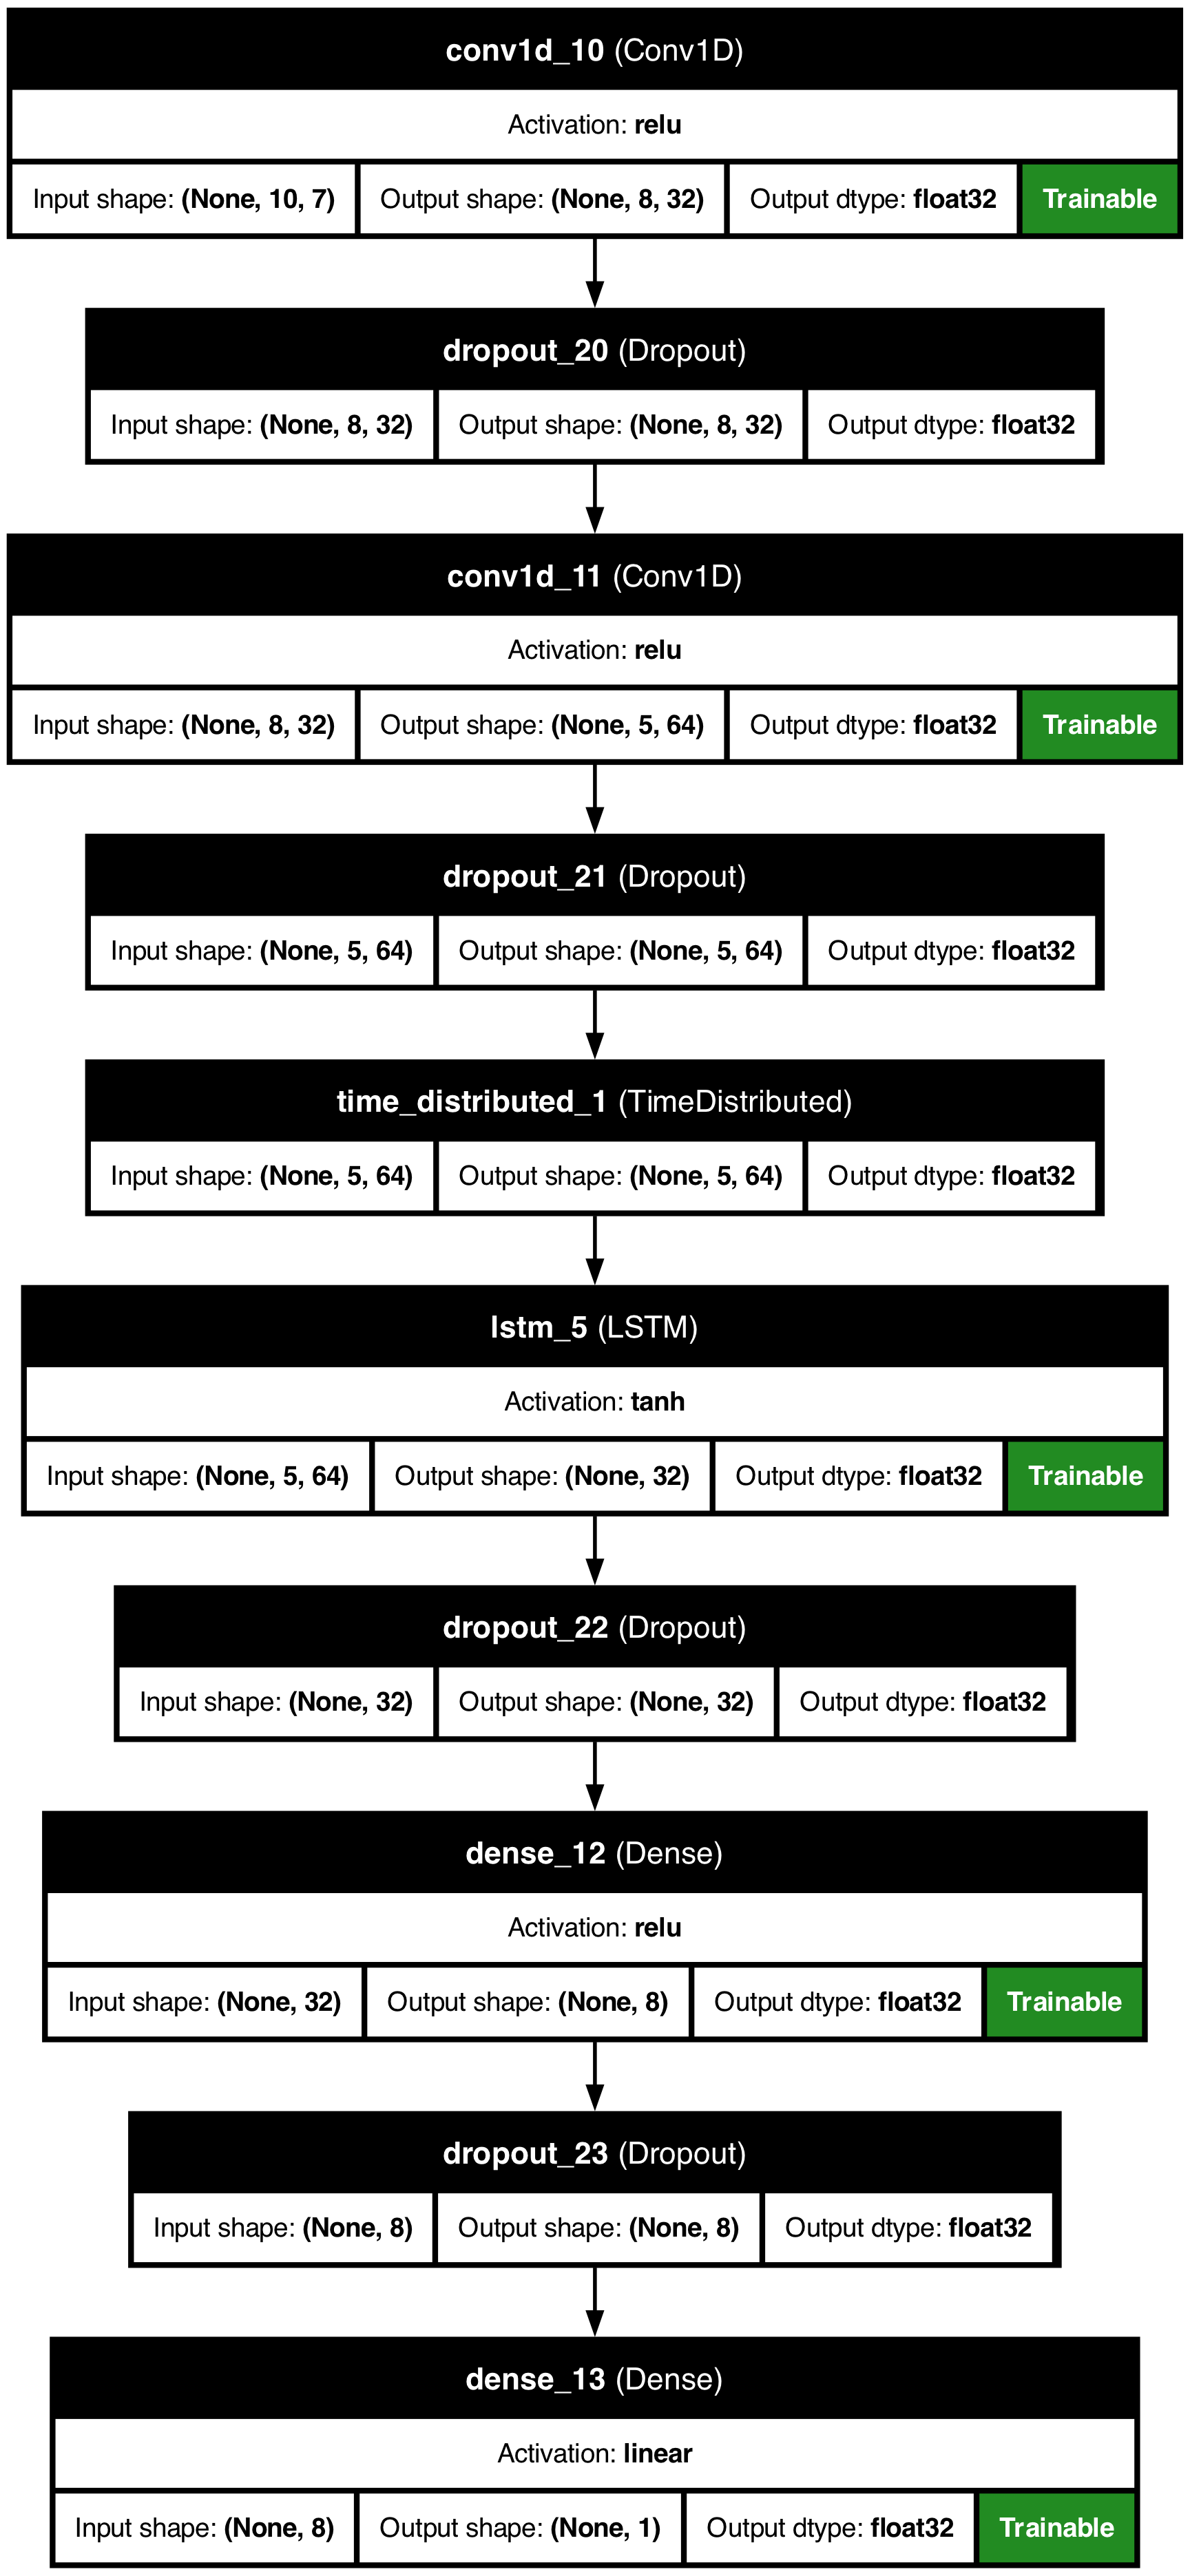

In [76]:
# modeling

from tensorflow.keras import models, layers

def create_model(input_shape, num_classes) :
    model = models.Sequential()

    # Spatial Feature Extractor
    model.add(layers.Conv1D(filters=32, kernel_size=3, 
                            activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv1D(filters=64, 
                            kernel_size=4, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Apply TimeDistributed on the LSTM layers
    model.add(layers.TimeDistributed(layers.Flatten()))  

    # Temporal Feature Extractor (LSTM)
    model.add(layers.LSTM(32, return_sequences=False))
    model.add(layers.Dropout(0.2))

    # Fully Connected Layer
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='MSE', metrics=['MAE'])

    return model

model = create_model(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), num_classes=1)

model.summary()
tf.keras.utils.plot_model(model,
                           show_dtype=True,
                           show_layer_activations=True,
                           show_layer_names=True,
                           show_shapes=True,
                           show_trainable=True)

In [77]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile (optimizer=optimizer, 
               loss='MSE', 
               metrics=['MAE'])

In [78]:
# fit

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping 및 ReduceLROnPlateau 추가함 (val_loss가 계속 상승하고 있어서 조치 취하기 위함)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model() :
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                       callbacks=[early_stopping, reduce_lr],
                        verbose=True)
    
    return history
    
history = train_model()
print (history)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_61365/3872882423.py
Epoch 1/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - MAE: 8.8425 - loss: 89.1652 - val_MAE: 8.0376 - val_loss: 73.4842 - learning_rate: 1.0000e-04
Epoch 2/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 7.7654 - loss: 70.9067 - val_MAE: 6.4232 - val_loss: 50.1784 - learning_rate: 1.0000e-04
Epoch 3/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 6.2168 - loss: 50.5449 - val_MAE: 4.8821 - val_loss: 31.9728 - learning_rate: 1.0000e-04
Epoch 4/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - MAE: 5.1304 - loss: 38.9011 - val_MAE: 3.7888 - val_loss: 21.4121 - learning_rate: 1.0000e-04
Epoch 5/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 3.9457 - loss: 26.4887 - val_MAE: 3.1395 - val_loss: 16.0320 - learning_rate: 1.0000e-04
Epoch 6/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - MAE: 3.5995 - loss: 23.8708 - val_MAE: 2.7609 - val_loss: 13.2807 - learning_rate: 1.0000e-04
Epoch 7/60
8

Epoch 46/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 2.4648 - loss: 11.0700 - val_MAE: 1.4645 - val_loss: 4.2299 - learning_rate: 1.0000e-04
Epoch 47/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 2.3988 - loss: 10.2506 - val_MAE: 1.4705 - val_loss: 4.2564 - learning_rate: 1.0000e-04
Epoch 48/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - MAE: 2.4405 - loss: 10.5736 - val_MAE: 1.4590 - val_loss: 4.1707 - learning_rate: 1.0000e-04
Epoch 49/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MAE: 2.5089 - loss: 11.1402 - val_MAE: 1.4606 - val_loss: 4.2094 - learning_rate: 1.0000e-04
Epoch 50/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - MAE: 2.4066 - loss: 10.2485 - val_MAE: 1.4465 - val_loss: 4.1070 - learning_rate: 1.0000e-04
Epoch 51/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 2.3781 - loss: 9.9920 - val_MAE: 1.4447 - val_loss: 4.0627 - learning_rate: 1.0000e-04
Epoch 52/60
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - MAE: 2.3459 - loss: 10.0521 - val_MAE: 1.4358 - val_loss: 4.0211 -

{'MAE': [8.6565523147583, 7.467136859893799, 5.886075973510742, 4.730945587158203, 3.8851284980773926, 3.589540719985962, 3.4558637142181396, 3.3605849742889404, 3.3435375690460205, 3.3045926094055176, 3.3284859657287598, 3.249722957611084, 3.201357364654541, 3.1841845512390137, 3.0853028297424316, 2.955423593521118, 2.9598348140716553, 2.8672211170196533, 2.861313581466675, 2.839961051940918, 2.807368278503418, 2.7772817611694336, 2.6766469478607178, 2.7569491863250732, 2.7148735523223877, 2.6640169620513916, 2.6342480182647705, 2.610050678253174, 2.5505218505859375, 2.616551399230957, 2.583535671234131, 2.531097412109375, 2.544215679168701, 2.503288507461548, 2.514829158782959, 2.478856325149536, 2.5035510063171387, 2.454953670501709, 2.509270668029785, 2.534496545791626, 2.48329758644104, 2.417349100112915, 2.4389073848724365, 2.4002275466918945, 2.4143929481506348, 2.4720404148101807, 2.4191062450408936, 2.443443775177002, 2.4299588203430176, 2.3992652893066406, 2.4088382720947266,

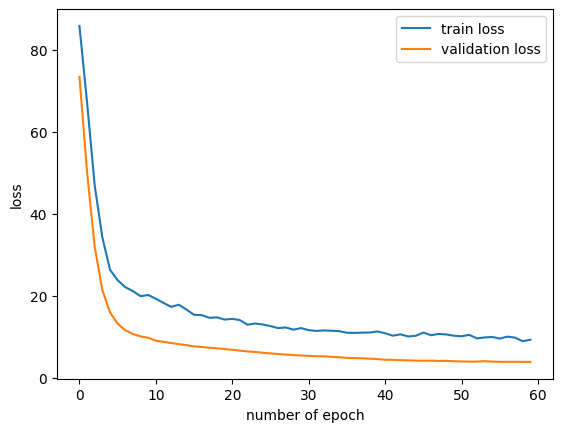

In [79]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

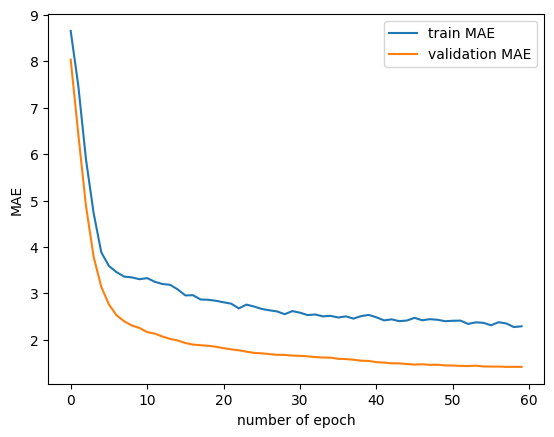

In [80]:
# MAE 시각화

plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.xlabel('number of epoch')
plt.ylabel('MAE')
plt.legend (['train MAE', 'validation MAE'])
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE: 4.055080393762723
MAE: 1.4179656925818902
R^2 Score: 0.601


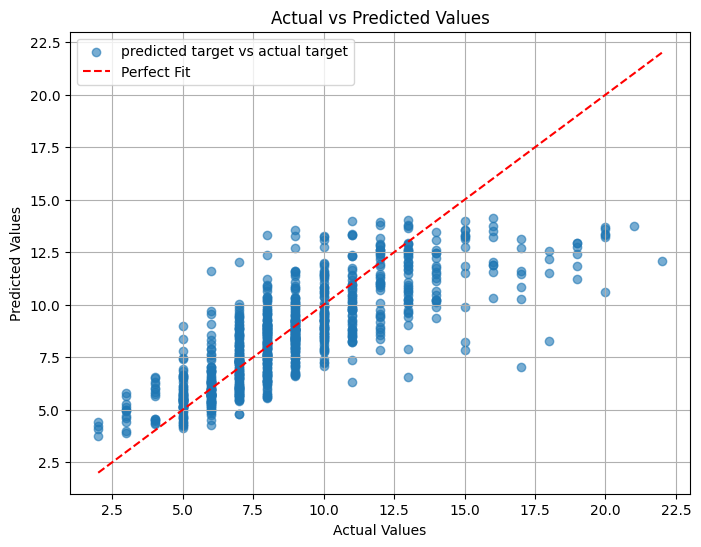

In [81]:
# MSE, MAE, R^2 구하기

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test_seq)
# print (y_test_pred)

mse = mean_squared_error(y_test_seq, y_test_pred)
mae = mean_absolute_error(y_test_seq, y_test_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

r2_3 = r2_score(y_test_seq, y_test_pred)
print(f'R^2 Score: {r2_3:.3f}')

# 예측값과 실제값 시각화

plt.figure(figsize=(8, 6))
plt.scatter(y_test_seq, y_test_pred, alpha=0.6, 
            label='predicted target vs actual target')
plt.plot([min(y_test_seq), max(y_test_seq)], 
         [min(y_test_seq), max(y_test_seq)], 
         color='red', linestyle='--', 
         label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
# evaluate

eval_3 = model.evaluate(X_test_seq, y_test_seq)
print (eval_3)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 1.3901 - loss: 4.0437 
[4.055080413818359, 1.4179657697677612]


--------



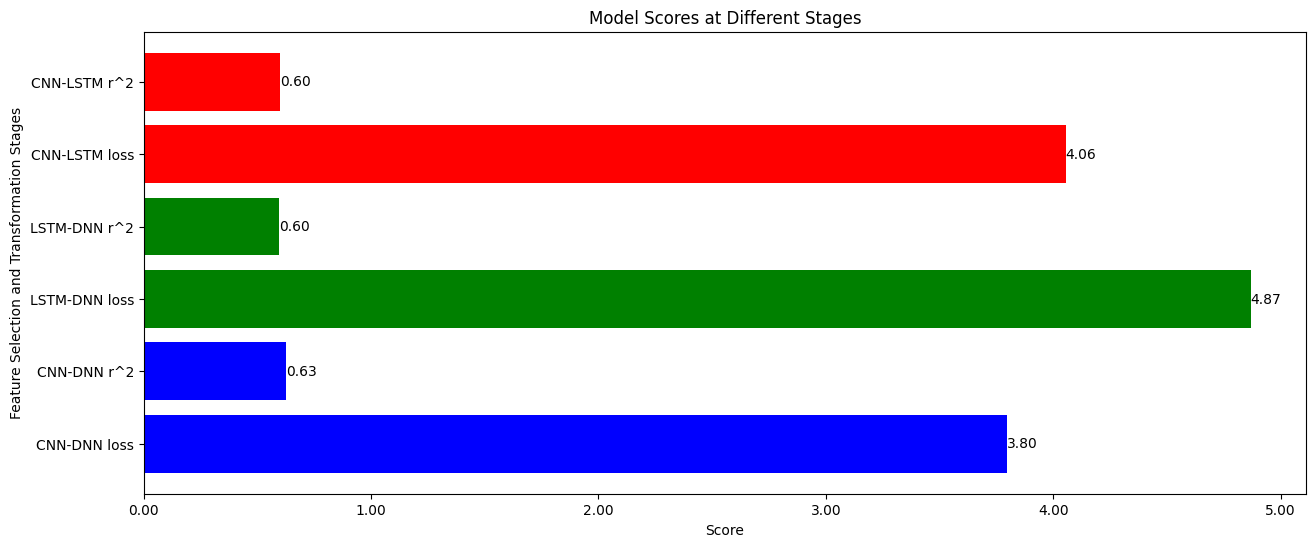

In [85]:
'''
    종합적으로 보기 위해 loss와 accuracy를 막대 그래프로 나타냄
'''

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

labels = [
    'CNN-DNN loss',
    'CNN-DNN r^2',
    'LSTM-DNN loss',
    'LSTM-DNN r^2',
    'CNN-LSTM loss',
    'CNN-LSTM r^2',
]

score1 = eval_1
score2 = eval_2
score3 = eval_3

scores = [score1[0], r2_1, score2[0], r2_2, score3[0], r2_3]

plt.figure(figsize=(15, 6))
bars = plt.barh(labels, scores, color=['blue', 'blue', 'green', 'green', 'red', 'red'])

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, f'{yval:.2f}', ha='left', va='center')

plt.xlabel('Score')
plt.ylabel('Feature Selection and Transformation Stages')
plt.title('Model Scores at Different Stages')

plt.xticks(np.arange(0, max(scores) + 1.0, 1.0))

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 소수점 2자리로 설정

plt.show()
